# 모든 훈련데이터셋에 대해서 데이터 증강하기
1. HorizontalFlip
2. Blur
3. GaussNoise
4. ISONoise
5. Rotation (45, 90, 135, 180, 225, 270, 315)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations as A
import cv2
import warnings
warnings.filterwarnings('ignore')

## 모든 훈련데이터에 대해서 좌우반전된 사진 생성

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
train.head()

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16


In [4]:
train.shape

(1570, 2)

In [5]:
train_img_list = train['ID'].to_list()

In [6]:
transform = A.Compose([
    A.HorizontalFlip(p=1)
])

for img in train_img_list:
    image = cv2.imread(f"./data/train/{img}")
    transformed_1 = transform(image=image)
    transformed_image_1 = transformed_1["image"]
    cv2.imwrite(f"./data/train/flipped_{img}", transformed_image_1)
    target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
    new_row = {'ID': f'flipped_{img}', 'target': target_value}
    train = train.append(new_row, ignore_index=True)


In [7]:
train.shape

(3140, 2)

## 모든 훈련데이터에 Blur, GaussNoise 처리한 데이터 만들기

In [8]:
train_img_list = train['ID'].to_list()

In [9]:
transform_1 = A.Compose([
    A.Blur(blur_limit=[4,4], always_apply=True)
])
transform_2 = A.Compose([
    A.GaussNoise(var_limit=(300, 300), p=1.0)
])

In [10]:
transform = A.Compose([
    A.HorizontalFlip(p=1)
])

for img in train_img_list:
    image = cv2.imread(f"./data/train/{img}")
    transformed_1 = transform_1(image=image)
    transformed_2 = transform_2(image=image)

    transformed_image_1 = transformed_1["image"]
    transformed_image_2 = transformed_2["image"]
    
    cv2.imwrite(f"./data/train/Blur_{img}", transformed_image_1)
    cv2.imwrite(f"./data/train/GaussNoise_{img}", transformed_image_2)  

    target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
    new_row1 = {'ID': f'Blur_{img}', 'target': target_value}
    new_row2 = {'ID': f'GaussNoise_{img}', 'target': target_value}

    train = train.append(new_row1, ignore_index=True)
    train = train.append(new_row2, ignore_index=True)

In [11]:
len(train['ID'].unique())

9420

## 모든 훈련데이터 45, 90, 135, 180, 225, 270, 315도 돌리기

In [12]:
train_img_list = train['ID'].to_list()

In [13]:
len(train_img_list)

9420

In [14]:
angles = [45, 90, 135, 180, 225, 270, 315]


for img in train_img_list:
    for angle in angles:
        transform = A.Compose([A.Rotate(limit=[-angle,-angle], border_mode=cv2.BORDER_CONSTANT, value=[255, 255, 255], p=1)])
        image = cv2.imread(f"./data/train/{img}")
        transformed = transform(image=image)
        transformed_image = transformed["image"]
        cv2.imwrite(f"./data/train/{angle}rotated_{img}", transformed_image)
        target_value = train.loc[train['ID'] == img, 'target'].iloc[0]
        new_row = {'ID': f'{angle}rotated_{img}', 'target': target_value}
        train = train.append(new_row, ignore_index=True)
            

In [15]:
train.shape

(75360, 2)

In [16]:
train

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16
...,...,...
75355,135rotated_GaussNoise_flipped_ffc22136f958deb1...,9
75356,180rotated_GaussNoise_flipped_ffc22136f958deb1...,9
75357,225rotated_GaussNoise_flipped_ffc22136f958deb1...,9
75358,270rotated_GaussNoise_flipped_ffc22136f958deb1...,9


In [17]:
train.to_csv('train_new.csv', index=False)

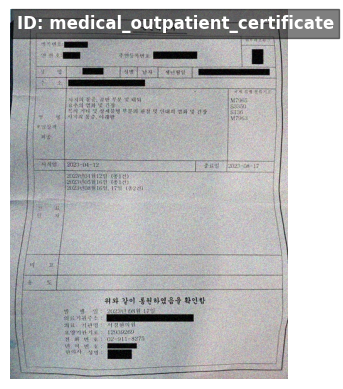

In [19]:
# 변환된 학습 이미지 확인
import random
df_1 = pd.read_csv('./data/train_new.csv')
df_2 = pd.read_csv('./data/meta.csv')

random_id = random.choice(df_1['ID'])
label = df_1[df_1['ID']==random_id]['target'].values[0]
label = df_2[df_2['target']==label]['class_name'].values[0]

image = cv2.imread(f"./data/train/{random_id}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image), plt.axis("off")
plt.text(10, 30, f'ID: {label}', color='white', fontsize=12, fontweight='bold', bbox=dict(facecolor='black', alpha=0.5))

plt.show()